In [54]:
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Exercice 1 : Un medecin souhaite mettre en lien l'impact de differentes variables mesurees sur
#un 'score' qu'il estime pour quantifier le niveau d'une maladie. Les donnees sont
#sauvegardees dans le fichier 'obs2021_1.csv'. Idealement, il souhaiterait que seul un
#sous ensemble de ces variables permette d'expliquer le score.
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



import pandas
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

df=pandas.read_csv("./obs2021_1.csv",sep=';')

listColNames=list(df.columns)


XY=df.values
ColNb_Y=listColNames.index('score')


Y=XY[:,ColNb_Y].reshape((XY.shape[0],1))   #reshape is to make sure that Y is a column vector
X = np.delete(XY, ColNb_Y, 1)

listColNames.pop(ColNb_Y)     #to make it contains the column names of X only
df.head(5)

var01  var02  var03  var04  var05  var06  var07  var08      var09  var10  \
0   11.6    6.4    4.3    7.2   14.4  19.26  39.32  50.00  13.040000   0.20   
1   15.5   10.5    4.9    6.9   13.7   8.57  36.78  22.57  18.713333   0.51   
2   15.3    6.5    4.2    6.4   13.6  13.48  25.90   8.25   8.246667   0.27   
3   13.4    7.7    4.1    5.8   14.2  15.23  44.36  11.09  11.093333   0.67   
4   16.0    5.2    3.2    5.7   12.8   8.37  19.62   7.44   6.386667   0.24   

    var11     var12  var13  var14  var15       var16  var17  var18  score  
0  0.0440 -1.578984  2.209   9.02   0.26   94.285053   3.56  16.91      6  
1  0.8501 -2.497499  0.339  22.43   0.10   86.766527   7.06  -3.47      6  
2  0.9629 -3.638758  0.339  17.94   0.13  107.336147   3.20  10.05     10  
3 -0.2756 -6.273760  1.611  11.38   0.20  136.516384   4.33  -3.62     18  
4 -0.6928 -2.096575  0.659   8.56   0.27   88.774469   4.57   1.56      7

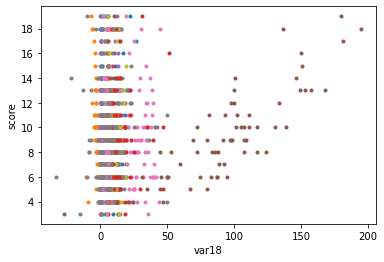

In [55]:
#QUESTION 1.1 : Observez les donnees unes par unes. Est-ce que vous identifiez visuellement des liens entre
#certaines variables et la variable 'score'. Si oui, lesquels ?

for Col in range(len(listColNames)):
  plt.plot(X[:,Col],Y[:],'.')
  plt.xlabel(listColNames[Col])
  plt.ylabel('score')
  #plt.show()


#### Les variables 1, 12, 16,

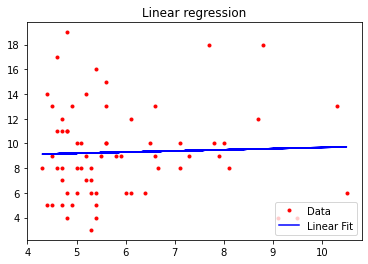

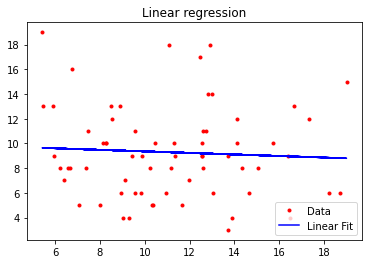

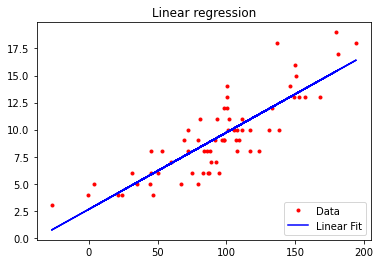

[13.548795843877867, 13.523200532992492, 3.833346710573031]


In [56]:
#QUESTION 1.2 :   On se demande si il est possible de predire le niveau de 'score' à partir d'une
#               seule des variables 'var02', 'var09' ou 'var16'.

#QUESTION 1.2.1 : Effectuez une regression lineaire simple entre 'score' et chacune de ces
#               variables.  Toutes les donnees seront utilisees pour l'apprentissage. Evaluez alors la
#               qualité des predictions, sur toutes les donnees, l'aide de la moyenne de l'erreur de
#               prediction sur toutes les donnees, l'aide de la moyenne de l'erreur de prediction au
#               carre (MSE). Quel est le risque potentiel en utilisant cette stratégie de validation
#               de l'apprentissage ?

from sklearn.linear_model import LinearRegression
L= [1,8,15]
MSE = []
for x in L:
    X2= X[:,x,np.newaxis]
    lr = LinearRegression()

    lr.fit(X2,Y)

    fig = plt.figure()
    plt.plot(X2, Y, 'r.')
    Y_pred = lr.predict(X2)
    erreur = Y_pred - Y
    mse = np.mean(erreur*erreur)
    MSE += [mse]
    plt.plot(X2, Y_pred, 'b-')
    plt.legend(('Data', 'Linear Fit'), loc='lower right')
    plt.title('Linear regression')
    plt.show()

print (MSE)

In [57]:
#QUESTION 1.2.2 : Evaluez a quel point les predictions sont stables a l'aide d'une methode de validation croisee
#               de type 5-folds.


from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

kf = KFold(n_splits=5)
for l in L:
  sum_mse_scores=0.
  for train, test in kf.split(X):
        X_train=X[train,l, np.newaxis]
        y_train=Y[train]
        X_test=X[test,l,np.newaxis]
        y_test=Y[test]
    
        lr = LinearRegression()
        lr.fit(X_train, y_train)
    
        y_pred = lr.predict(X_test)
        mse_score = mean_squared_error(y_test, y_pred)
        sum_mse_scores+=mse_score
  print(l," total: ",sum_mse_scores/5)


1  total:  14.941458117496378
8  total:  14.25287157588833
15  total:  4.119884056119778


In [58]:
Y_mean = np.ones(len(Y))
mean = sum(Y)/len(Y)
for i in range(66):
    Y_mean[i] = mean

Y_mean.shape



(66,)

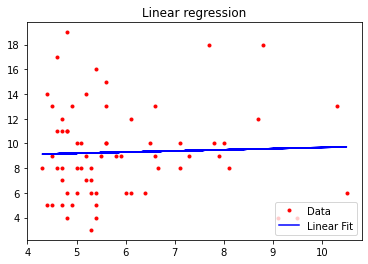

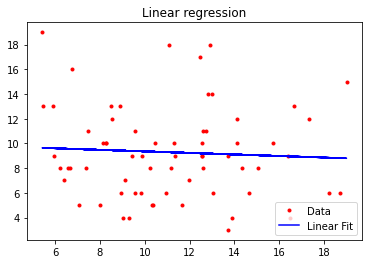

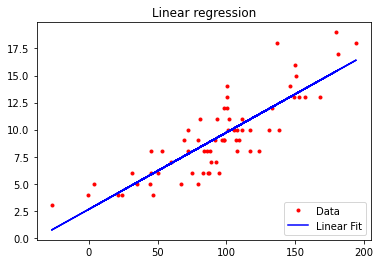

[array([0.00146257]), array([0.00334893]), array([0.71748484])]


In [59]:
#QUESTION 1.2.3 : Peut-on enfin dire si on observe une relation significative entre 'score'
#               et (independament) 'var02', 'var09' ou bien 'var16'. On peut le valider
#               a l'aide d'un test d'hypothese dont on decrira la procedure.

#### On considère qu'il y a bien corrélation si R**2 > 0,7

from sklearn.linear_model import LinearRegression
L= [1,8,15]
MSE = []
R = []
for x in L:
    X2= X[:,x,np.newaxis]
    lr = LinearRegression()

    lr.fit(X2,Y)

    fig = plt.figure()
    plt.plot(X2, Y, 'r.')
    Y_pred = lr.predict(X2)
    SST = sum((Y-mean)*(Y-mean))
    SSR = sum((Y_pred-mean)*(Y_pred-mean))
    erreur = Y_pred - Y
    mse = np.mean(erreur*erreur)
    MSE += [mse]
    r = SSR/SST
    R+= [r]
    plt.plot(X2, Y_pred, 'b-')
    plt.legend(('Data', 'Linear Fit'), loc='lower right')
    plt.title('Linear regression')
    plt.show()

print (R)

[(29, 0.30104958877196186), (48, 0.2897340217675924)]
[(49, 9.480069068487184), (29, 9.513469491267475)]


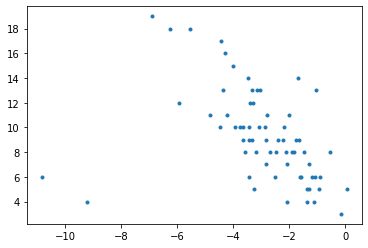

In [60]:
#QUESTION 1.3 : On s'interesse maintenant au lien entre la variable 'score' et 'var12'.
#               On peut remarquer que ces donnees contiennent deux valeurs aberrantes.
#
#QUESTION 1.3.1 : Definissez une procedure pour detecter automatiquement deux donnees aberrantes dans
#               un jeu de donnees.
#

### Test de la qualité de la regression après suppression d'une observation

from sklearn.linear_model import LinearRegression
L= 11
MSE = []
R = []
plt.plot(X[:,11],Y[:],'.')
for i in range(66):
    X2= np.concatenate((X[:i,L,np.newaxis],X[i+1:,L,np.newaxis]),axis=0)
    lr = LinearRegression()
    Y2= np.concatenate((Y[:i],Y[i+1:]),axis=0)
    lr.fit(X2,Y2)

 
    Y_pred = lr.predict(X2)
    SST = np.sum((Y2-mean)*(Y2-mean))
    SSR = np.sum((Y_pred-mean)*(Y_pred-mean))
    erreur = Y_pred - Y2
    mse = np.mean(erreur*erreur)
    MSE += [mse]
    r = SSR/SST
    R+= [r]

#print(MSE)
#print(R)


############### Recherche d'outlier #########

## Méthode de maximisation du R²
Outlier1 = []
rMax = max(R)
rMax_ind = R.index(rMax)
R.pop(rMax_ind)
Outlier1 += [(rMax_ind,rMax)]
rMax2 = max(R)
rMax_ind2 = R.index(rMax2)
R.pop(rMax_ind2)
Outlier1 += [(rMax_ind2,rMax2)]
print(Outlier1)

## Méthode de minimisation de la MSE
Outlier2 = []
mMin = min(MSE)
mMin_ind = MSE.index(mMin)
MSE.pop(mMin_ind)
Outlier2 += [(mMin_ind,mMin)]
mMin2 = min(MSE)
mMin_ind2 = MSE.index(mMin2)
MSE.pop(mMin_ind2)
Outlier2 += [(mMin_ind2,mMin2)]
print(Outlier2)



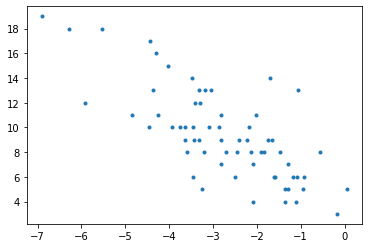

In [61]:
#QUESTION 1.3.2 : Nous supprimerons dans la suite de cet exercice les deux observations qui sont aberrantes sur
#               la variable 'var12'. 

### Suppression des Outliers

X_new = np.delete(X,29,0)
X_new2 = np.delete(X_new,48,0)
Y_new = np.delete(Y,29)
Y_new2 = np.delete(Y_new,48)
plt.plot(X_new2[:,11],Y_new2[:],'.')



In [62]:
#QUESTION 1.3.2 : . Comment auriez-vous traite ces observations si vous aviez absolument
#                voulu preserver l'information qu'elles contiennent dans les autres variables ?


# Remplacer les valeurs par une prédicition : on apprend sur les n-2 observations, puis on remplace les deux outliers 
# par la prédiction de notre régression linéaire. 

In [63]:
#QUESTION 1.4 :   Une fois les deux observations aberrantes de 'var12' supprimees, on souhaite selectionner les
#               variables de 'X' qui permettent de prédire au mieux 'score' a l'aide de la
#               regression multiple regularisee.

#QUESTION 1.4.1 : Quelle strategie vous semble la plus appropriee pour selectionner les variables les plus
#               pertinentes ? Quel pretraitement allez-vous de meme effectuer sur les donnees.

### Regression Lasso --> Normaliser les vecteurs

from sklearn.preprocessing import normalize

for i in range(X_new2.shape[1]):
    X_new2[:,i] = X_new2[:,i]/np.linalg.norm(X_new2[:,i])

#Y_new2 = Y_new2/np.linalg.norm(Y_new2)
thresh= len(X_new2) // 2
X_train = X_new2[thresh:]
y_train = Y_new2[thresh:]
X_test = X_new2[:thresh]
y_test = Y_new2[:thresh]
print(np.linalg.norm(X_new2[:,1]))
print(X_new2.shape)

1.0
(64, 18)


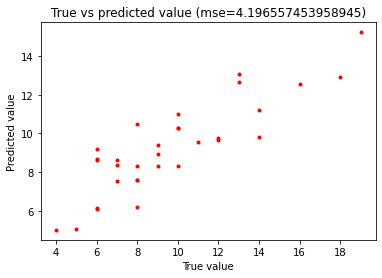

In [64]:
#QUESTION 1.4.2 : Effectuez la procedure de selection des variables optimales en parametrant a la main le poids
#               entre la qualite de prediction et le niveau de regularisation.

from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold

alpha = 0.03

lasso_regressor = Lasso(alpha=alpha)
lasso_regressor.fit(X_train, y_train)

y_pred_lasso = lasso_regressor.predict(X_test)
mse_score_lasso = mean_squared_error(y_test, y_pred_lasso)

fig = plt.figure()
plt.plot(y_test, y_pred_lasso, 'r.')
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.title('True vs predicted value (mse='+str(mse_score_lasso)+')')
plt.show()


In [65]:
#### Paramétrisation "à la main" du poids alpha

kf = KFold(n_splits=5)
for alpha in [0.02,0.022,0.024]:
  sum_mse_scores=0.
  compteur = 0
  for train, test in kf.split(X_new2):
    compteur +=1
    X_train=X_new2[train]
    y_train=Y_new2[train]
    X_test=X_new2[test]
    y_test=Y_new2[test]
  
    lasso_regressor = Lasso(alpha=alpha)
    lasso_regressor.fit(X_train, y_train)
    y_pred_lasso = lasso_regressor.predict(X_test)
    mse_score_lasso = mean_squared_error(y_test, y_pred_lasso)
    sum_mse_scores+=mse_score_lasso


  print(alpha," total: ", sum_mse_scores/compteur)
  print("List des Betas --> ", lasso_regressor.coef_.tolist())



0.02  total:  3.119443067015996
List des Betas -->  [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 0.001882125965932028, -0.0, -20.731233848275508, 0.0, -0.0, -0.0, 38.613653113739176, -0.0, -0.09371821364885022]
0.022  total:  3.144544024681662
List des Betas -->  [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, -20.466037009989336, 0.0, -0.0, -0.0, 38.06119137459904, -0.0, -0.0]
0.024  total:  3.176255320768147
List des Betas -->  [0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, -20.182567781181106, 0.0, -0.0, -0.0, 37.541548216725126, -0.0, -0.0]


In [66]:
### alpha optimal --> 0.022

In [67]:
#QUESTION 1.4.3 : Effectuez la procedure automatique de parametrisation de ce poids, de sorte a ce qu'un maximum
#               de trois variables soit typiquement selectionne et que la qualite de prediction soit optimale.
#               Quelle methode de validation croisee vous semble la plus raisonnable ici ? La selection des
#               variables est-elle stable ?

alpha = 0.022
mse1 = 1
mse2 = 0
n=0
while (abs(mse1-mse2)>10**(-1) and n<500):
    n+=1
    A = [alpha+0.01,alpha-0.01]
    for a in A:
        compteur=0
        for train, test in kf.split(X_new2):
            compteur +=1
            X_train=X_new2[train]
            y_train=Y_new2[train]
            X_test=X_new2[test]
            y_test=Y_new2[test]
        
            lasso_regressor = Lasso(alpha=a)
            lasso_regressor.fit(X_train, y_train)
            y_pred_lasso = lasso_regressor.predict(X_test)
            mse_score_lasso = mean_squared_error(y_test, y_pred_lasso)
            #print("mse :", mse_score_lasso)
            sum_mse_scores+=mse_score_lasso
            if a>alpha:
                mse1=sum_mse_scores/compteur
            else:
                mse2=sum_mse_scores/compteur
    if mse1>mse2:
        alpha -= 0.001
    else:
        alpha += 0.001

print(alpha,mse1,mse2)

    


0.5220000000000004 12001.88430090851 12015.664968221265


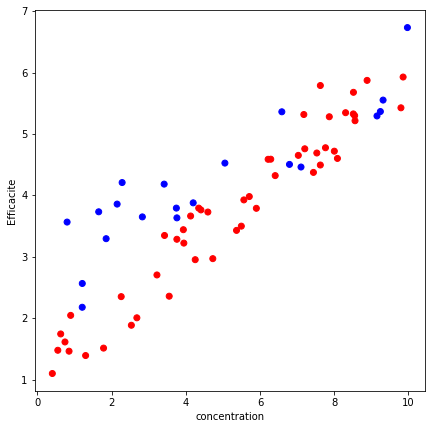

Groupe  concentration  Efficacite
0  Groupe_1         3.9479      3.2224
1  Groupe_1         1.7838      1.5127
2  Groupe_1         7.4415      4.3736
3  Groupe_1         8.5625      5.2151
4  Groupe_1         9.8002      5.4256

In [128]:
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++   
# Exercice 2 : Lors d'essais cliniques, un groupe pharmaceutique souhaite savoir si la
#              concentration d'un produit dans un traitement pour la vue a le meme effet
#              sur deux sous populations. Les resultats d'observations sont regroupes dans
#              le fichier obs2021_2.csv. Dans chacun des groupes, on supposera que le lien
#              entre la concentration du produit et l'efficacite du traitement est lineaire.
#              Definissez et appliquez une methodologie pour tester si l'impact de cette
#              concentration est similaire dans les deux groupes ?
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

df=pd.read_csv("./obs2021_2.csv",sep=',')

plt.figure(figsize=(7,7))
plt.scatter(df['concentration'], df['Efficacite'], c=['r' if t == 'Groupe_1' else 'b' for t in df['Groupe']])
plt.xlabel("concentration")
plt.ylabel("Efficacite")
plt.show()

df.head()

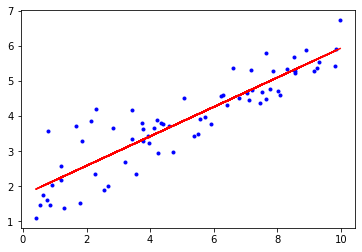

In [120]:
### Nous proposons dans un premier temps de faire une régression linéaire sur l'ensemble des individus, et de calculer la 
### variabilité des résidus pour chaque groupe. On effectue alors une analyse de variance pour estimer si les deux groupes
### ont les mêmes résidus moyens.


X = df.concentration.values
X = X[:,np.newaxis]
Y = df.Efficacite.values
lr = LinearRegression()
lr.fit(X,Y)
Yhat = lr.predict(X)
plt.plot(X,Y,'b.')
plt.plot(X,Yhat,'r-')

In [126]:
#   H0 : Les deux groupes ont les mêmes moyennes résiduelles par rapport à la droite de régression linéaire.
#   H1 : Les deux groupes n'ont pas les mêmes moyennes résiduelles par rapport à la droite de régression linéaire.


Residus = Y-Yhat
Residus1 = Y[:50]-Yhat[:50]
Residus2 = Y[50:]-Yhat[50:]
MoyResidus1=sum(Residus1)/len(Residus1)
MoyResidus2=sum(Residus2)/len(Residus2)
MoyResidus=np.mean(Residus)
VarResidus1 = sum((Residus1-MoyResidus1)**2)/(50-1)
VarResidus2 = sum((Residus2-MoyResidus2)**2)/(20-1)
VarResidus = sum((Residus-MoyResidus)**2)/(70-2)


In [133]:
### ANOVA

SST = sum((Residus - MoyResidus)**2)
SSW = sum((Residus1-MoyResidus1)**2)+sum((Residus2-MoyResidus2)**2)
SSB = 50*(MoyResidus1-MoyResidus)**2+20*(MoyResidus2-MoyResidus)**2

DFBetween = 2-1
DFWithin = 70-2


MSW = SSW/DFWithin
MSB = SSB/DFBetween

F = MSB/MSW

p = stats.f.sf(F, DFBetween, DFWithin)
print(p)
print("Moyenne des résidus (=0) :", MoyResidus, "Moy Résidus 1 : ", MoyResidus1, "Moy Résidus 2 : ",MoyResidus2)

8.105092590348622e-08
Moyenne des résidus (=0) : 3.108624468950438e-16 Moy Résidus 1 :  -0.21341512424696762 Moy Résidus 2 :  0.53353781061742


In [ ]:
### p est très largement inférieur à 0.05, il est donc extrêmement improbable que les groupe 1 et 2 aient des moyennes résiduelles égales.
### On en déduit que abs(MoyResidus) < abs(MoyResidus2) (Rejet de l'hypothèse nulle) et donc que la régression linéaire proposée 
### ne permet pas de rendre compte aussi fidèlement du comportement du médicament sur le groupe 1 que sur le groupe 2. C'est logique, puisque
### le groupe 1 est surreprésenté dans le panel d'observations. 


### L'hypothèse de départ était que le lien entre la concentration de médicament et son efficaté était linéaire dans chacun des groupes. Nous 
### proposons à présent de tester cette hypothèse. 


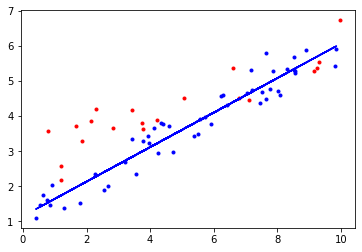

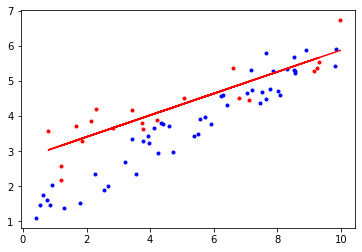

In [151]:
### Nous proposons dans un second de temps d'effectuer une Regression linéaire sur chaque groupe, afin de vérifier leur caractère linéaire, 
### puis de réaliser une analyse de variance.

# H01 la fonction est considérée linéaire si R²>0,9 et quasi linéaire si 0.7 < R² < 0.9
# H02 la fonction est considérée quasi linéaire si 0.7 < R² < 0.9
# H03 les deux moyennes sont considérés égales si 1-cf la fonction génératrice de la statistique de Fischer prise sur les écarts résiduels
# est supérieure à 0,05.


### Régression Linéaire sur les groupe 1 et 2

X1 = df[df.Groupe=='Groupe_1'].concentration.values
X1 = X1[:,np.newaxis]
Y1 = df[df.Groupe=='Groupe_1'].Efficacite.values

X2 = df[df.Groupe=='Groupe_2'].concentration.values
X2 = X2[:,np.newaxis]
Y2 = df[df.Groupe=='Groupe_2'].Efficacite.values

lr1 = LinearRegression()
lr2 = LinearRegression()

lr1.fit(X1,Y1)
lr2.fit(X2,Y2)

Y1hat = lr1.predict(X1)
Y2hat = lr1.predict(X2)

plt.plot(X2,Y2,'r.')
plt.plot(X1,Y1,'b.')
plt.plot(X1,Y1hat,'b-')

plt.figure()
plt.plot(X2,Y2,'r.')
plt.plot(X1,Y1,'b.')
plt.plot(X2,lr2.predict(X2),'r-')

In [159]:
### Etude de la linéarité


### Première régression

Residus1 = Y1-Y1hat
MSE1 = np.mean(Residus1**2)
SST = sum((Y1-np.mean(Y1))**2)
SSR = sum((Y1hat-np.mean(Y1))**2)
R1 = SSR/SST
print("R1² = ", R1, "MSE1 = ", MSE1)

### On a bien R1²>0.9, l'hypothèse H01 est retenue, la fonction est linéaire

### Deuxième régression

Res2 = Y2-lr2.predict(X2)
MSE2 = np.mean(Res2**2)
SST = sum((Y2-np.mean(Y2))**2)
SSR = sum((lr2.predict(X2)-np.mean(Y2))**2)
R2 = SSR/SST
print("R2² = ", R2, "MSE2 = ", MSE2)

### 0,7<R2²<0,9, l'hypothèse H02 est retenue, la fonction est quasie linéaire.

R1² =  0.932629020148961 MSE1 =  0.12887409752130752
R2² =  0.7949154120026494 MSE2 =  0.2216057613258669


In [141]:
Residus1 = Y1-Y1hat
MSE1 = np.mean(Residus1**2)
Residus2 = Y2-Y2hat
MSE2 = np.mean(Residus2**2)
MoyResidus1=sum(Residus1)/len(Residus1)
MoyResidus2=sum(Residus2)/len(Residus2)
MoyResidus=np.mean(Residus)
VarResidus1 = sum((Residus1-MoyResidus1)**2)/(50-1)
VarResidus2 = sum((Residus2-MoyResidus2)**2)/(20-1)
VarResidus = sum((Residus-MoyResidus)**2)/(70-2)

In [145]:

SSW = sum((Residus1-MoyResidus1)**2)+sum((Residus2-MoyResidus2)**2)
SSB = 50*(MoyResidus1-MoyResidus)**2+20*(MoyResidus2-MoyResidus)**2

DFBetween = 2-1
DFWithin = 70-2


MSW = SSW/DFWithin
MSB = SSB/DFBetween

F = MSB/MSW

p = stats.f.sf(F, DFBetween, DFWithin)

print(p)
print("Moy Résidus 1 : ", MoyResidus1, "Moy Résidus 2 : ",MoyResidus2)
print("MSE premier groupe : ", MSE1 , "MSE deuxième groupe", MSE2)


7.79458117894562e-10
Moy Résidus 1 :  2.220446049250313e-16 Moy Résidus 2 :  0.7955788369852078
MSE premier groupe :  0.12887409752130752 MSE deuxième groupe 1.1540245966090068


In [ ]:
### On a cette fois ci p ~ e-10, ce qui nous permet une nouvelle fois de rejeter l'hypothèse d'égalité des moyennes résiduelles.

### En conclusion, on a bien montré que l'efficacité du médicament chez le groupe 1 était une fonction linéaire de la concentration et que ce
### le modèle linéaire associé au groupe 1 n'était pas satisfaisants pour expliquer le comportement du médicament dans le groupe 2!